# Hw3 (schelling's model)

Mirpulatov Islombek

PHD-1, CDSE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [245]:
def create_random_grid(rows, cols):
    grid = np.random.choice([0, 1, 2], size=(rows, cols))
    return grid

In [246]:
def plot_grid(grid):
    plt.figure(figsize=(6, 6))
    cmap = plt.cm.colors.ListedColormap(['white', 'blue', 'green'])
    plt.imshow(grid, cmap=cmap, interpolation='nearest')

In [247]:
def save_grid(grid, r, inc):
    plt.figure(figsize=(7, 7))
    cmap = plt.cm.colors.ListedColormap(['white', 'blue', 'green'])
    plt.imshow(grid, cmap=cmap, interpolation='nearest')
    plt.savefig(f'gif_{r}/{str(inc).zfill(5)}.png', dpi=300)

In [248]:
def calculate_percentage(array, a):
    if not array:
        return 0.0
    count_a = array.count(a)
    percentage = (count_a / len(array)) * 100
    return percentage

In [249]:
def not_satisfied(grid, threshold=0):
    w, h = grid.shape
    res = np.zeros((w, h), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            nbr = []
            if (i - 1 >= 0) and (j - 1 >= 0):
                nbr.append(grid[i - 1][j - 1])
            if i - 1 >= 0:
                nbr.append(grid[i - 1][j])
            if (i - 1 >= 0) and (j + 1 < h):
                nbr.append(grid[i - 1][j + 1])
            if j - 1 >= 0:
                nbr.append(grid[i][j - 1])
            if j + 1 < h:
                nbr.append(grid[i][j + 1])
            if (i + 1 < w) and (j - 1 >= 0):
                nbr.append(grid[i + 1][j - 1])
            if i + 1 < w:
                nbr.append(grid[i + 1][j])
            if (i + 1 < w) and (j + 1 < h):
                nbr.append(grid[i + 1][j + 1])
            
            if calculate_percentage(nbr, grid[i][j]) < threshold:
                res[i][j] = 1
            else:
                res[i][j] = 0
    return res         

In [250]:
def do_step(grid, threshold):
    s_matrix = not_satisfied(grid, threshold=threshold)
    indices = np.argwhere(s_matrix == 1)
    values_to_shuffle = grid[indices[:, 0], indices[:, 1]]
    np.random.shuffle(values_to_shuffle)
    grid[indices[:, 0], indices[:, 1]] = values_to_shuffle
    return grid

## 1. Create 9 gifs of map evolution for 9 values of R (5 points)

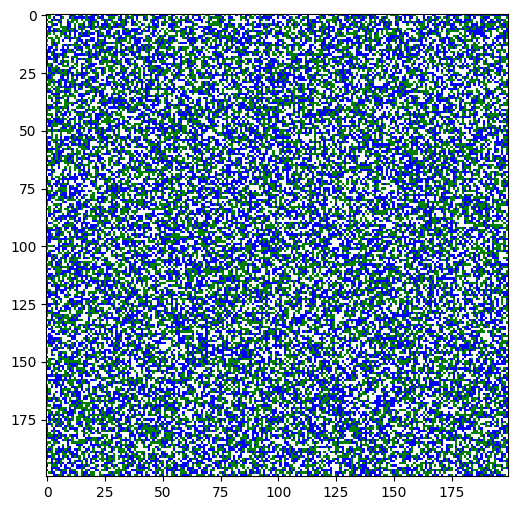

In [251]:
rows, cols = 200, 200
R = np.array([0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/5, 7/8, 1]) * 100

random_grid = create_random_grid(rows, cols)
plot_grid(random_grid)

In [252]:
# for r in R:
#     ! rm -rf gif_{r}

In [253]:
# for r in R:
#     ! mkdir gif_{r}

In [ ]:
for r in R:
    grid = random_grid.copy()
    for i in range(1, 100):
        save_grid(grid, r, i)
        grid = do_step(grid, r)
    save_grid(grid, r, 100)

In [242]:
import os
import imageio

In [255]:
for r in R:
    image_directory = f'gif_{r}/'

    png_files = [f for f in os.listdir(image_directory) if f.endswith('.png')]
    png_files.sort()

    image_paths = [os.path.join(image_directory, file) for file in png_files]
    images = []

    for image_path in image_paths:
        images.append(imageio.imread(image_path))

    imageio.mimsave(f'R={r}.gif', images, duration=0.3)

/var/folders/8j/vwy2k2l10fxdvy2znl1r2bpm0000gn/T/ipykernel_37781/3377773240.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(image_path))


## 2. Plot the number of households that want to move versus time for 9 values of R on one graph, label 9 curves, label the axes and title the graph. (2 points)

In [260]:
def do_step(grid, threshold):
    s_matrix = not_satisfied(grid, threshold=threshold)
    indices = np.argwhere(s_matrix == 1)
    ln = len(indices)
    values_to_shuffle = grid[indices[:, 0], indices[:, 1]]
    np.random.shuffle(values_to_shuffle)
    grid[indices[:, 0], indices[:, 1]] = values_to_shuffle
    return ln, grid

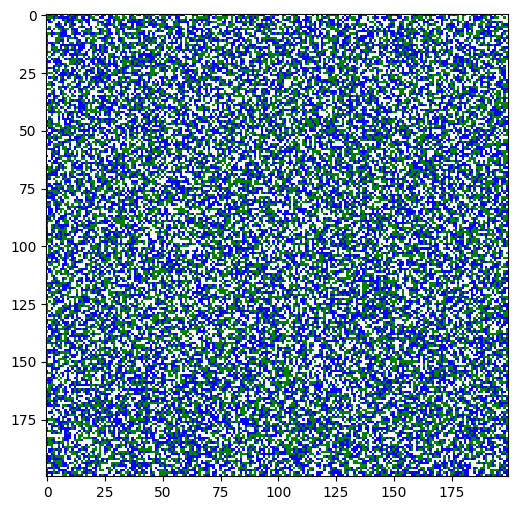

In [261]:
rows, cols = 200, 200
R = np.array([0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/5, 7/8, 1]) * 100

random_grid = create_random_grid(rows, cols)
plot_grid(random_grid)

In [265]:
results = {}
for r in R:
    grid = random_grid.copy()
    ln_lst = []
    for i in range(0, 100):
        ln, grid = do_step(grid, r)
        ln_lst.append(ln)
    results[r] = ln_lst

In [266]:
inds = list(range(0, 100))

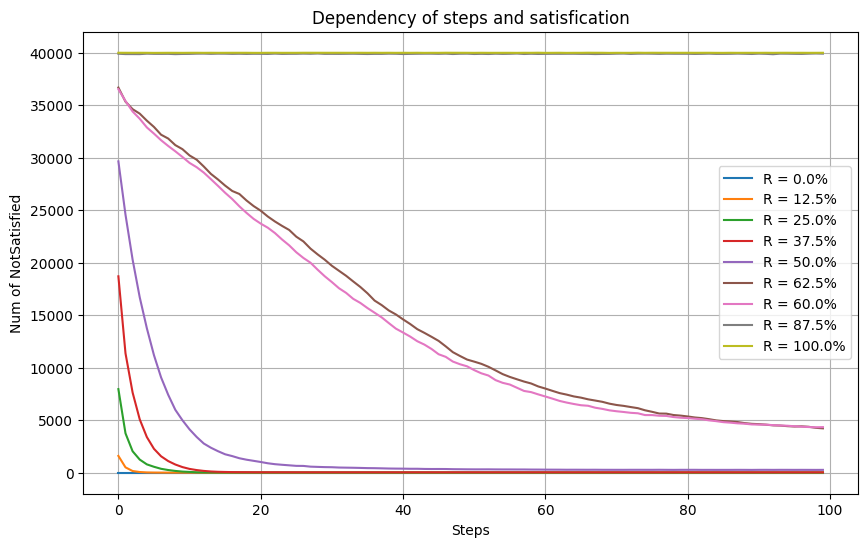

In [273]:
plt.figure(figsize=(10, 6)) # In this example, all the plots will be in one figure.    
for r in R:
    plt.plot(inds, results[r], label=f"R = {r}%")
plt.grid()
plt.title("Dependency of steps and satisfication")
plt.xlabel('Steps')
plt.ylabel('Num of NotSatisfied')
plt.legend()
plt.show()